In [3]:
import os
import cv2
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import numpy as np

In [2]:
def is_image_black_or_white(image_path, threshold=10):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mean_value = cv2.mean(image)[0]
    return mean_value < threshold or mean_value > 255 - threshold

# Function to filter out black and white images and preprocess the data
def preprocess_data(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    # Count the number of images in each class
    class_counts = {}
    total_images = 0

    for folder_name in os.listdir(input_folder):
        folder_path = os.path.join(input_folder, folder_name)
        if not os.path.isdir(folder_path):
            continue
        class_counts[folder_name] = 0

        images = os.listdir(folder_path)
        total_images += len(images)

        for image_name in images:
            image_path = os.path.join(folder_path, image_name)

            if is_image_black_or_white(image_path):
                print("Black or white image found:", image_path)
                continue

            class_counts[folder_name] += 1
            output_subfolder = os.path.join(output_folder, folder_name)
            os.makedirs(output_subfolder, exist_ok=True)
            shutil.copy(image_path, output_subfolder)

    print("Total images before preprocessing:", total_images)
    print("Total images after preprocessing:", sum(class_counts.values()))

# Set the paths to your original data folders
train_data_folder = "data/train"
test_data_folder = "data/test"

# Set the paths to the preprocessed data folders
preprocessed_train_folder = "/data/preprocessed_training"
preprocessed_test_folder = "/data/preprocessed_testing"

# Preprocess the training data
preprocess_data(train_data_folder, preprocessed_train_folder)

# Preprocess the testing data
preprocess_data(test_data_folder, preprocessed_test_folder)

Black or white image found: data/train\angry\Training_10131352.jpg
Black or white image found: data/train\angry\Training_28756096.jpg
Black or white image found: data/train\angry\Training_32571770.jpg
Black or white image found: data/train\angry\Training_52563817.jpg
Black or white image found: data/train\angry\Training_5645946.jpg
Black or white image found: data/train\angry\Training_78540321.jpg
Black or white image found: data/train\angry\Training_96772745.jpg
Black or white image found: data/train\angry\Training_99531165.jpg
Black or white image found: data/train\fear\Training_75260133.jpg
Black or white image found: data/train\happy\Training_19307133.jpg
Black or white image found: data/train\happy\Training_87607167.jpg
Black or white image found: data/train\neutral\Training_89335926.jpg
Black or white image found: data/train\sad\Training_48621797.jpg
Black or white image found: data/train\surprise\Training_10264146.jpg
Black or white image found: data/train\surprise\Training_4840

In [ ]:
pip install scikit-learn

In [11]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the original training folder
original_folder = '/data/preprocessed_training'

# Path to the new training and validation folders
new_training_folder = '/data/train80'
new_validation_folder = '/data/val20'

# Define the ratio for splitting (e.g., 80% for training, 20% for validation)
train_ratio = 0.8

# Iterate through the original folder and its subdirectories
for root, dirs, files in os.walk(original_folder):
    for dir_name in dirs:
        dir_path = os.path.join(root, dir_name)
        new_train_dir = os.path.join(new_training_folder, dir_path[len(original_folder)+1:])
        new_val_dir = os.path.join(new_validation_folder, dir_path[len(original_folder)+1:])

        os.makedirs(new_train_dir, exist_ok=True)
        os.makedirs(new_val_dir, exist_ok=True)

        # Split images within the current subdirectory
        all_files = os.listdir(dir_path)
        train_files, val_files = train_test_split(all_files, train_size=train_ratio, random_state=42)

        for file in train_files:
            src = os.path.join(dir_path, file)
            dst = os.path.join(new_train_dir, file)
            shutil.copy(src, dst)

        for file in val_files:
            src = os.path.join(dir_path, file)
            dst = os.path.join(new_val_dir, file)
            shutil.copy(src, dst)

In [10]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Set the batch size and image input dimensions
batch_size = 32
input_shape = (48, 48, 3)  # Change to grayscale (1 channel)

# Flow training images from the preprocessed training folder
train_generator = train_datagen.flow_from_directory(
    new_training_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    color_mode='rgb',   # Change to grayscale
    class_mode='categorical',
    shuffle=True
)

# Flow validation images from the preprocessed testing folder
validation_generator = test_datagen.flow_from_directory(
    new_validation_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    color_mode='rgb', # Change to grayscale
    class_mode='categorical',
    shuffle=False
)

Found 22950 images belonging to 7 classes.
Found 5742 images belonging to 7 classes.


In [ ]:
pip install matplotlib

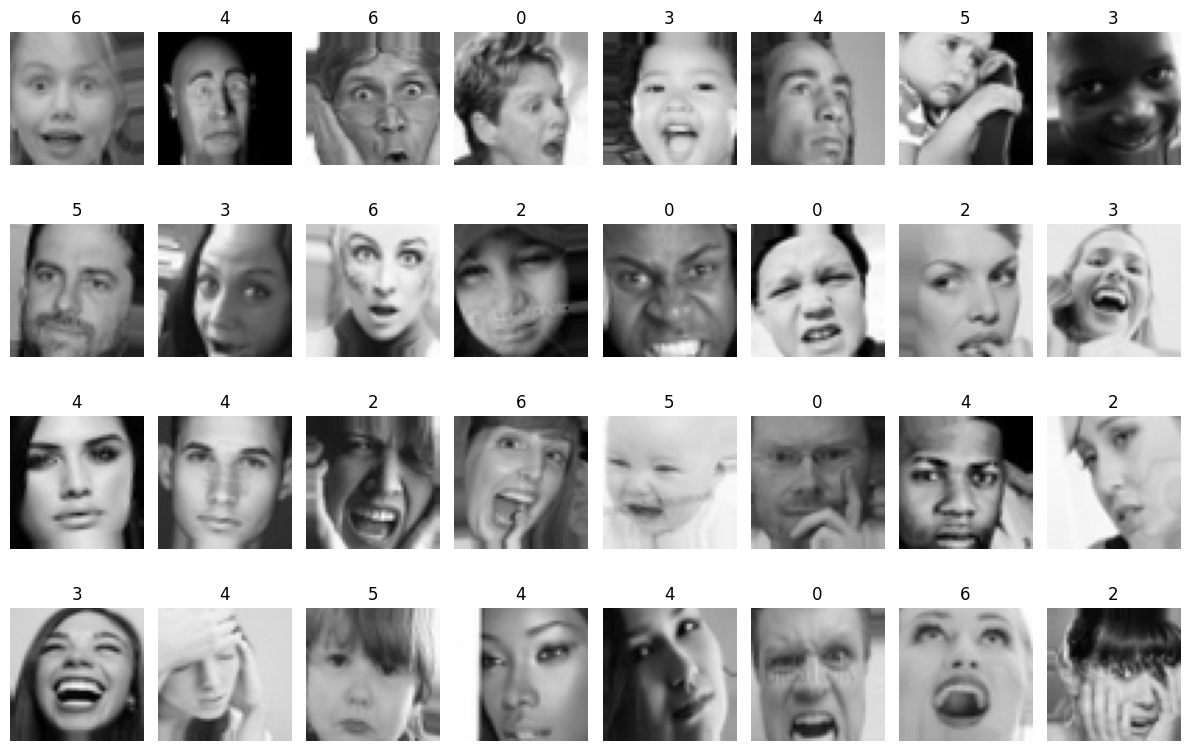

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels from train_generator
x_batch, y_batch = next(train_generator)

# Print the images and labels for train_generator
fig, axes = plt.subplots(4, 8, figsize=(12, 8))
axes = axes.ravel()
for i in range(32):
    axes[i].imshow(np.squeeze(x_batch[i]), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(np.argmax(y_batch[i]))
plt.tight_layout()
plt.show()

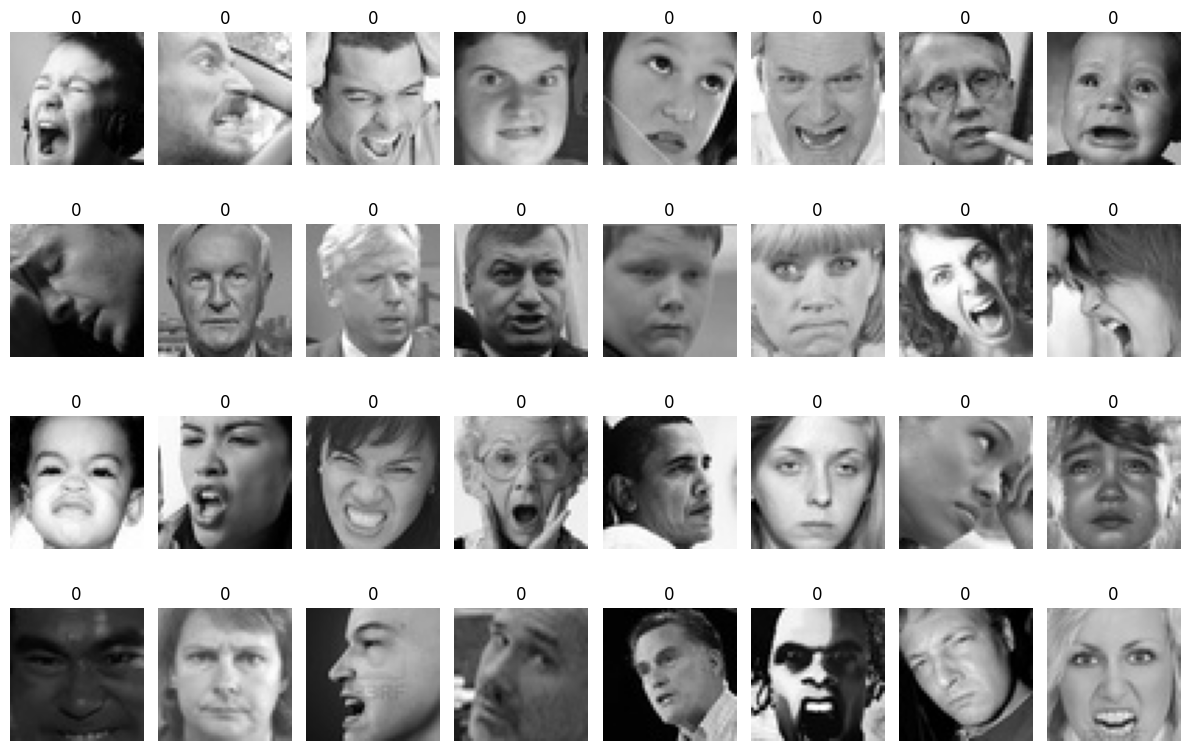

In [12]:
# Get a batch of images and labels from validation_generator
x_batch, y_batch = next(validation_generator)

# Print the images and labels for validation_generator
fig, axes = plt.subplots(4, 8, figsize=(12, 8))
axes = axes.ravel()
for i in range(32):
    axes[i].imshow(np.squeeze(x_batch[i]), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(np.argmax(y_batch[i]))
plt.tight_layout()
plt.show()

In [4]:
num_classes = 7
img_rows, img_cols = 48, 48

model = Sequential()

# Block-1
model = Sequential()


model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=(img_rows, img_cols, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block-2
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block-3
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block-4
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block-5
model.add(Flatten())
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7
model.add(Dense(num_classes, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())




C:\Users\surug\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,328,743 (5.07 MB)

 Trainable params: 1,326,567 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

None


In [27]:
import numpy as np
from sklearn.utils import compute_class_weight

# Get the true class labels from the generator
train_labels = train_generator.classes

# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_labels),
    y=train_labels
)

# Convert class labels to int and weights to float
class_weights = {int(k): float(v) for k, v in zip(np.unique(train_labels), class_weights)}

# Print the result
print("Class Weights:", class_weights)

Class Weights: {0: 1.0280876226313667, 1: 9.421182266009852, 2: 1.000784929356358, 3: 0.5682099529586532, 4: 0.825628664963845, 5: 0.8487112163011723, 6: 1.2943432406519655}


In [15]:
# from keras import backend as K
# def weighted_categorical_crossentropy(weights):
#     """
#     A weighted version of keras.objectives.categorical_crossentropy

#     Variables:
#         weights: numpy array of shape (C,) where C is the number of classes

#     Usage:
#         weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
#         loss = weighted_categorical_crossentropy(weights)
#         model.compile(loss=loss,optimizer='adam')
#     """

#     weights = K.variable(weights)

#     def loss(y_true, y_pred):
#         # scale predictions so that the class probas of each sample sum to 1
#         y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
#         # clip to prevent NaN's and Inf's
#         y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
#         # calc
#         loss = y_true * K.log(y_pred) * weights
#         loss = -K.sum(loss, -1)
#         return loss

#     return loss


In [16]:
# # Define the class weights (adjust these values accordingly)
# class_weights = np.array([  0.9912646149711061,  9.083743842364532,  1.0874244434615952, 0.5478583807873236,  0.7960571284671007,  0.9270213657310431,  1.2479837572612937])  # Example weights for three classes

# # Create the weighted loss function
# weighted_loss = weighted_categorical_crossentropy(class_weights)

In [17]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping

# # ... (previous code for model creation and compilation)

# # Define early stopping callback
# early_stopping = EarlyStopping(
#     monitor='val_loss',  # Monitor validation loss
#     patience=5,  # Number of epochs with no improvement before stopping
#     verbose=1,  # Print messages about early stopping
#     restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
# )

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=1
)


NameError: name 'steps_per_epoch' is not defined

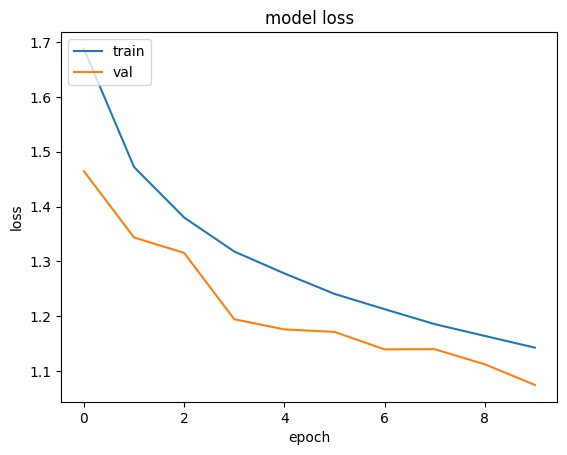

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

ValueError: You must call `compile()` before using the model.

In [51]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_loss',
                             mode='auto',
                             save_best_only=True,
                             verbose=1)

# Pass both callbacks to model.fit()
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, checkpoint],  # Pass both callbacks
    verbose=1
)


Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.6116 - loss: 1.0545  
Epoch 1: val_loss improved from inf to 1.00931, saving model to best_model.keras
718/718 ━━━━━━━━━━━━━━━━━━━━ 162s 225ms/step - accuracy: 0.6116 - loss: 1.0545 - val_accuracy: 0.6233 - val_loss: 1.0093
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.6221 - loss: 1.0375  
Epoch 2: val_loss did not improve from 1.00931
718/718 ━━━━━━━━━━━━━━━━━━━━ 158s 220ms/step - accuracy: 0.6221 - loss: 1.0375 - val_accuracy: 0.6200 - val_loss: 1.0208
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 37s/step - accuracy: 0.6263 - loss: 1.0290    
Epoch 3: val_loss improved from 1.00931 to 1.00186, saving model to best_model.keras
718/718 ━━━━━━━━━━━━━━━━━━━━ 26268s 37s/step - accuracy: 0.6263 - loss: 1.0290 - val_accuracy: 0.6315 - val_loss: 1.0019
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.6268 - loss: 1.0195  
Epoch 4: val_loss did not improve from 1.00186
718/718 ━━━━━━━━━

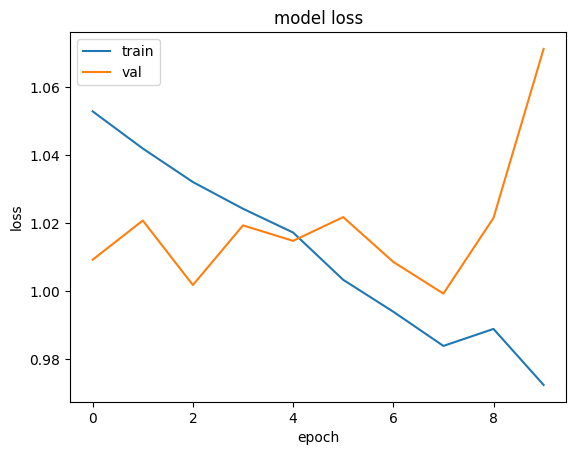

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

180/180 ━━━━━━━━━━━━━━━━━━━━ 71s 396ms/step - accuracy: 0.2552 - loss: 1.7611
Test Loss: 1.6849653720855713
Test Accuracy: 0.315395325422287


180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step


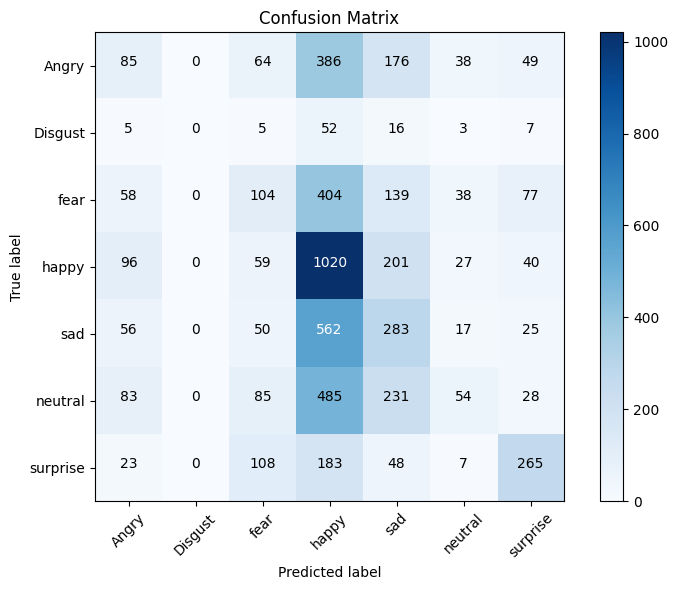

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions for the test data
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ['Angry', 'Disgust', 'fear', 'happy', 'sad','neutral', 'surprise']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Fill the matrix with values and labels
thresh = confusion_mat.max() / 2.0
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, format(confusion_mat[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mat[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step


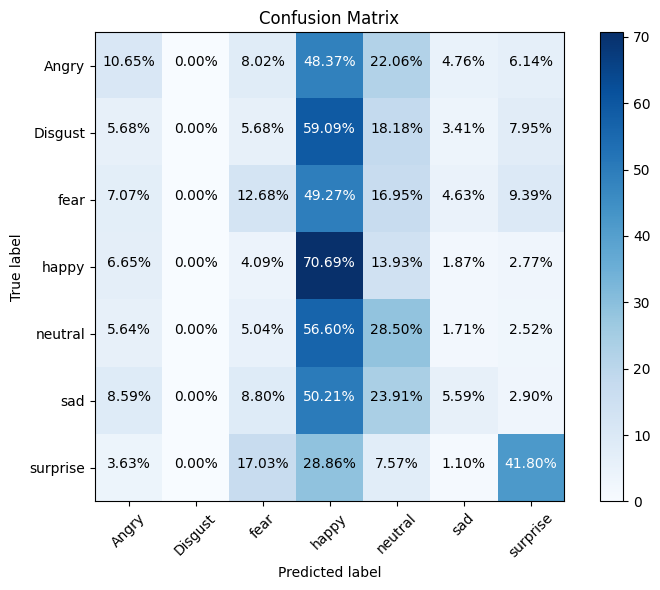

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions for the test data
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Calculate the percentage values in the confusion matrix
confusion_mat_percentage = confusion_mat / confusion_mat.sum(axis=1)[:, np.newaxis] * 100

# Define class labels
class_labels = ['Angry', 'Disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat_percentage, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Fill the matrix with percentage values and labels
thresh = confusion_mat_percentage.max() / 2.0
for i in range(confusion_mat_percentage.shape[0]):
    for j in range(confusion_mat_percentage.shape[1]):
        plt.text(j, i, format(confusion_mat_percentage[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if confusion_mat_percentage[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [24]:
# Define augmented parameters for TTA
tta_datagen = ImageDataGenerator(
     rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

preprocessed = "data/test"

# Flow test images from the preprocessed test folder with TTA
tta_generator = tta_datagen.flow_from_directory(
    preprocessed,
    target_size=input_shape[:2],
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

num_augmentations = 15

# Initialize an array to store predictions for TTA
test_predictions_sum = np.zeros((tta_generator.samples, num_classes))


# Generate predictions using TTA for test data


# Generate predictions using TTA for test data
for _ in range(num_augmentations):
    test_predictions = model.predict(
        tta_generator,
        steps=tta_generator.samples // tta_generator.batch_size,
        verbose=1
    )
    test_predictions_sum[:test_predictions.shape[0]] += test_predictions

# Average the predictions for test data
test_predictions_avg = test_predictions_sum / num_augmentations

# Convert the predicted probabilities to class labels for test data
test_predicted_labels = np.argmax(test_predictions_avg, axis=1)

# ... (calculate and print test accuracy and other evaluations if needed)
# ... (calculate and print test accuracy and other evaluations if needed)
from sklearn.metrics import classification_report, confusion_matrix

# Calculate and print test accuracy
test_accuracy = np.mean(test_predicted_labels == tta_generator.classes)
print("Test Accuracy (with TTA): {:.2f}%".format(test_accuracy * 100))

# # Calculate and print classification report
# class_names = list(tta_generator.class_indices.keys())
# print("Classification Report:\n")
# print(classification_report(tta_generator.classes, test_predicted_labels, target_names=class_names))

# Calculate and print confusion matrix
confusion = confusion_matrix(tta_generator.classes, test_predicted_labels)
print("Confusion Matrix:\n")
print(confusion)

Found 7178 images belonging to 7 classes.


C:\Users\surug\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


224/224 ━━━━━━━━━━━━━━━━━━━━ 128s 572ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 45s 201ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 46s 204ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 47s 208ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 49s 216ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 49s 220ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 46s 206ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 46s 204ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 84s 376ms/step 
224/224 ━━━━━━━━━━━━━━━━━━━━ 44s 196ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 44s 195ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 43s 190ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 43s 193ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 44s 194ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 44s 196ms/step
Test Accuracy (with TTA): 31.43%
Confusion Matrix:

[[  85    0   54  583  167   35   34]
 [   8    0    4   82   13    4    0]
 [  54    0  109  607  158   16   80]
 [  41    0   40 1401  219   32   41]
 [  47    0   33  812  305   21   15]
 [  63    0   44  784  273   57   26]
 [  28    0  114  311   68   11  299]]


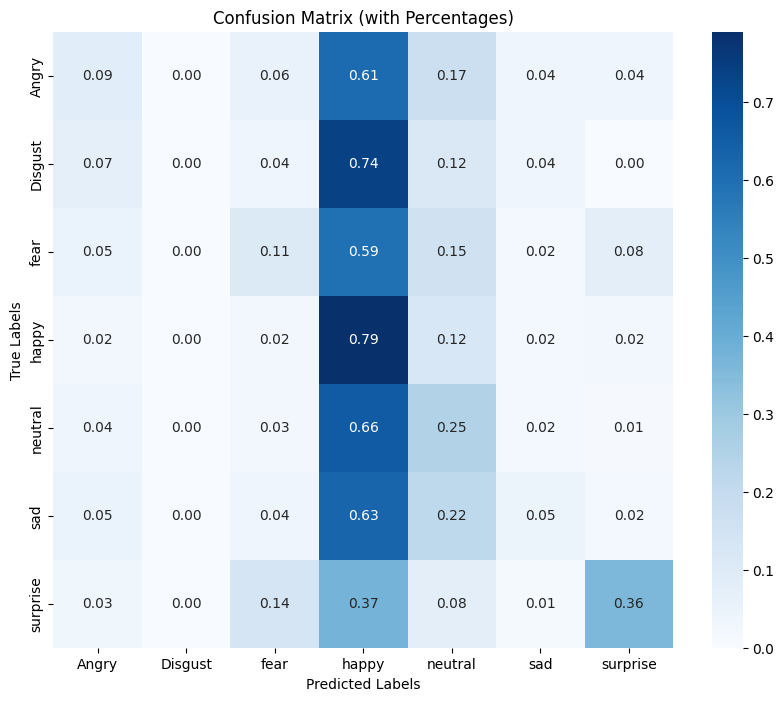

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate the confusion matrix with percentages
confusion_percent = confusion / confusion.sum(axis=1, keepdims=True)
class_names = ['Angry', 'Disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_percent,
    annot=True,
    fmt=".2f",  # Display percentages with two decimal places
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix (with Percentages)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()